<img src="avatar_meme_1_1.jpg" width="1300">

# Do you know this series?

<img src="avatar_netflix_poster.png" width="500">

# Step 0: Parsing 

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

driver = webdriver.Chrome()
driver.get("https://www.imdb.com/title/tt9018736/reviews/?ref_=tt_ov_urv")
wait = WebDriverWait(driver, 10)

# "Hide Spoilers" нажимаем
try:
    hide_spoilers_button = wait.until(EC.element_to_be_clickable((By.ID, "title-reviews-hide-spoilers")))
    hide_spoilers_button.click()
    time.sleep(1)  
    print("Скрытие спойлеров включено.")
except:
    print("Иконка 'Hide Spoilers' не найдена.")

reviews_data = []
collected_reviews = 0  


while collected_reviews < 300:
    reviews = driver.find_elements(By.CLASS_NAME, "ipc-list-card--border-speech")

    for review in reviews[len(reviews_data):]: 
        try:
            driver.execute_script("arguments[0].scrollIntoView(true);", review)
            time.sleep(0.5)  
            review_text = review.find_element(By.CLASS_NAME, "ipc-html-content-inner-div").text
            
            try:
                rating = review.find_element(By.CLASS_NAME, "ipc-rating-star--rating").text
            except:
                rating = None
            
            try:
                likes = review.find_element(By.CLASS_NAME, "ipc-voting__label__count--up").text
            except:
                likes = '0'  

            try:
                dislikes = review.find_element(By.CLASS_NAME, "ipc-voting__label__count--down").text
            except:
                dislikes = '0'  
            
            if review_text not in [r['text'] for r in reviews_data]:
                reviews_data.append({
                    "text": review_text,
                    "rating": rating,
                    "likes": likes,
                    "dislikes": dislikes
                })
                collected_reviews += 1
                if collected_reviews >= 300:
                    break

        except Exception as e:
            print(f"Ошибка при извлечении данных: {e}")

    if collected_reviews < 300:
        try:
            load_more_button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "ipc-see-more__text")))
            load_more_button.click()
            time.sleep(2)  
            
        except:
            print("Кнопка '25 more' не найдена. Возможно, все отзывы уже загружены.")
            break

driver.quit()


In [ ]:
import pandas as pd 
df = pd.read_csv("1_avatar_reviews_final.csv")
df

## Step 1: Sentiment analysis

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob

input_file = "avatar_reviews_cleaned (3).csv"
output_file = "avatar_reviews_sentiment.csv"
reviews_data = []

with open(input_file, "r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    for row in reader:
        review_text = row["text"]
        blob = TextBlob(review_text)
        sentiment = blob.sentiment.polarity  
        if sentiment > 0.222:
            sentiment_category = "1"
        else:
            sentiment_category = "0"
        reviews_data.append({
            "id": row["id"],
            "text": review_text,
            "sentiment": sentiment,
            "sentiment_category": sentiment_category
        })
with open(output_file, "w", encoding="utf-8", newline="") as file:
    fieldnames = ["id", "text", "sentiment", "sentiment_category"]
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(reviews_data)


In [67]:
NLP_dataset = pd.read_csv ("avatar_reviews_sentiment.csv")
NLP_dataset.head(30)

,id,text,sentiment,sentiment_category
0,1,I understand that adapting a cartoon series sc...,0.192898,0
1,2,I'm too exhausted with these pointless live ac...,0.174411,0
2,3,"At long last, Netflix's Avatar: The Last Airbe...",0.213175,0
3,4,"I really loved the animated Series of Avatar, ...",0.237218,1
4,5,I know Avatar: The Last Airbender is one of th...,0.169050,0
5,6,"As a longtime fan of ""Avatar: The Last Airbend...",0.107241,0
6,7,"No misunderstanding, I'm loving the latest Net...",0.227897,1
7,8,Avatar: The Last Airbender is based off the an...,0.208021,0
8,9,"First things first, they did a top notch job w...",0.151515,0
9,10,Overall i enjoyed the show. The visual FX is a...,-0.007870,0


In [29]:
NLP_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  300 non-null    int64  
 1   text                300 non-null    object 
 2   sentiment           300 non-null    float64
 3   sentiment_category  300 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 9.5+ KB


In [30]:
NLP_dataset.describe()

,id,sentiment,sentiment_category
count,300.000000,300.000000,300.000000
mean,150.500000,0.183066,0.383333
std,86.746758,0.115877,0.487011
min,1.000000,-0.121212,0.000000
25%,75.750000,0.109920,0.000000
50%,150.500000,0.186461,0.000000
75%,225.250000,0.256065,1.000000
max,300.000000,0.536000,1.000000


# Step 2: Exploring Dataset

In [31]:
NLP_dataset['length'] = NLP_dataset['text'].apply(len)
NLP_dataset.head(20)

,id,text,sentiment,sentiment_category,length
0,1,I understand that adapting a cartoon series sc...,0.192898,0,1001
1,2,I'm too exhausted with these pointless live ac...,0.174411,0,787
2,3,"At long last, Netflix's Avatar: The Last Airbe...",0.213175,0,905
3,4,"I really loved the animated Series of Avatar, ...",0.237218,1,755
4,5,I know Avatar: The Last Airbender is one of th...,0.169050,0,923
5,6,"As a longtime fan of ""Avatar: The Last Airbend...",0.107241,0,1381
6,7,"No misunderstanding, I'm loving the latest Net...",0.227897,1,953
7,8,Avatar: The Last Airbender is based off the an...,0.208021,0,955
8,9,"First things first, they did a top notch job w...",0.151515,0,708
9,10,Overall i enjoyed the show. The visual FX is a...,-0.007870,0,773


In [32]:
positive = NLP_dataset[NLP_dataset['sentiment_category']==1]
positive

,id,text,sentiment,sentiment_category,length
3,4,"I really loved the animated Series of Avatar, ...",0.237218,1,755
6,7,"No misunderstanding, I'm loving the latest Net...",0.227897,1,953
11,12,"Amazing scenary and editing, it really gives o...",0.239091,1,651
13,14,Absolutely loved Avatar The Last Airbender on ...,0.361045,1,694
15,16,"I wasn't intending to watch this, but after a ...",0.334643,1,665
...,...,...,...,...,...
290,291,Avatar: The Last Airbender is a tv series full...,0.395859,1,612
292,293,I feel disappointed with so much mix and match...,0.239513,1,1724
295,296,Test obviously it's going to miss an element o...,0.391667,1,675
296,297,Now it's obviously not going to be like the or...,0.240927,1,902


In [33]:
print('max =',positive['length'].max())
print('min =',positive['length'].min())

max = 3611
min = 600


In [34]:
negative = NLP_dataset[NLP_dataset['sentiment_category']==0]
negative

,id,text,sentiment,sentiment_category,length
0,1,I understand that adapting a cartoon series sc...,0.192898,0,1001
1,2,I'm too exhausted with these pointless live ac...,0.174411,0,787
2,3,"At long last, Netflix's Avatar: The Last Airbe...",0.213175,0,905
4,5,I know Avatar: The Last Airbender is one of th...,0.169050,0,923
5,6,"As a longtime fan of ""Avatar: The Last Airbend...",0.107241,0,1381
...,...,...,...,...,...
291,292,I couldn't make it through the first episode b...,0.072222,0,606
293,294,"Now first and foremost, I have never watched t...",0.108333,0,886
294,295,"[+30%) They got us with the CGI, man. The grap...",0.086075,0,1963
297,298,"If you have not seen the animated series, you ...",-0.075110,0,1421


In [35]:
print('max =',negative['length'].max())
print('min =',negative['length'].min())

max = 6925
min = 580


Text(0.5, 1.0, 'Negative vs Positive')

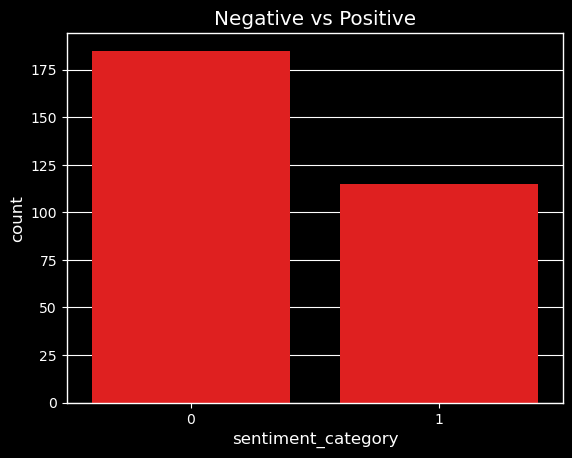

In [ ]:
from matplotlib import style

style.use('dark_background')
sns.countplot(x="sentiment_category", data=NLP_dataset, color='r')
plt.title('Negative vs Positive')

<img src="avatar_meme_1.jpg" width="1000">

Text(0.5, 1.0, 'Distribution of length')

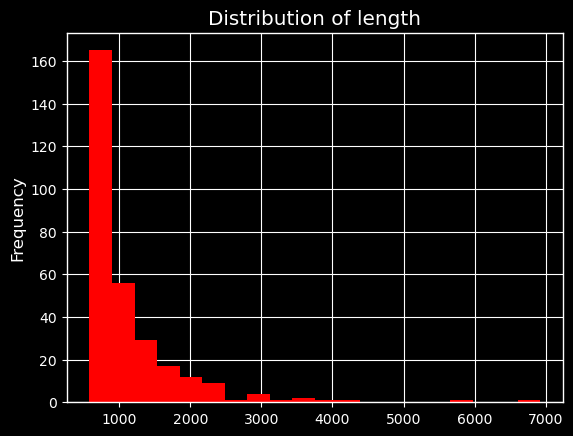

In [37]:
NLP_dataset['length'].plot(bins=20, kind='hist', color='r')
plt.title('Distribution of length')

Text(0.5, 1.0, 'Distribution of length(positive)')

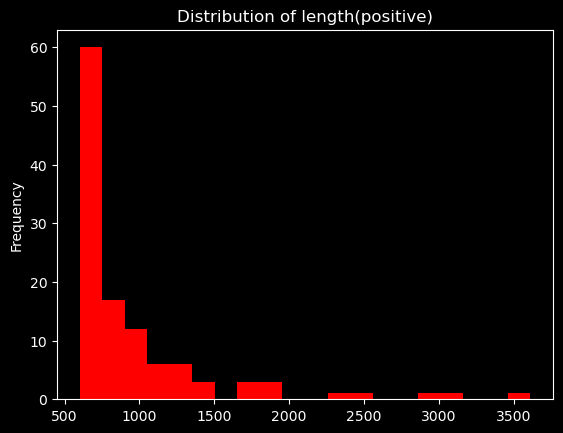

In [77]:
positive['length'].plot(bins=20, kind='hist', color='r')
plt.title('Distribution of length(positive)')

Text(0.5, 1.0, 'Distribution of length(negative)')

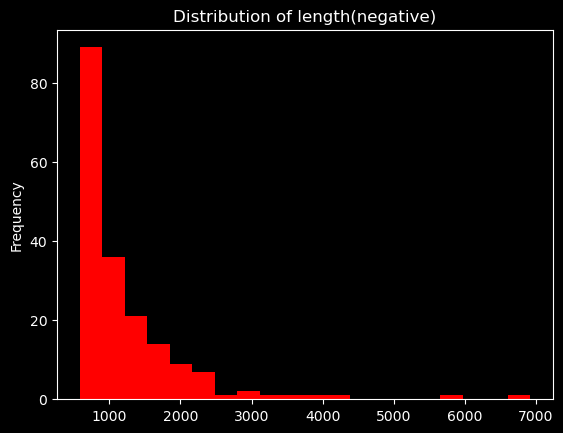

In [76]:
negative['length'].plot(bins=20, kind='hist', color='r')
plt.title('Distribution of length(negative)')

# Step 3: Plotting the Wordclouds and Stop words, removing Punctuation

### 3.1: Plotting wordcloud

In [38]:
sentences = NLP_dataset['text'].tolist()
sentences

["I understand that adapting a cartoon series scene by scene into a live adaptation is impractical. However, removing the lead character's pivotal arc, which was integral to the essence of the original story, weakens the storytelling. The Aang portrayed lacks the innocence and depth of the 12-year-old protagonist we grew to love; instead, he's presented as a young adult novel archetype warrior.\n\nMoreover, the characters seem to lack the comedic traits that defined them, resulting in scenes that feel devoid of emotion and overly somber.\n\nThe direction feels stagnant, with characters rigidly placed and delivering exposition rather than engaging dynamically with the world around them.\n\nNumerous unnecessary changes detract from the impactful moments, surprising reveals, and character development that made the original series so compelling.\n\nWhile I appreciate the efforts put into the visuals and action sequences, they shouldn't be the sole focus of a production with such a substant

In [39]:
words = " ".join(sentences)
words

'I understand that adapting a cartoon series scene by scene into a live adaptation is impractical. However, removing the lead character\'s pivotal arc, which was integral to the essence of the original story, weakens the storytelling. The Aang portrayed lacks the innocence and depth of the 12-year-old protagonist we grew to love; instead, he\'s presented as a young adult novel archetype warrior.\n\nMoreover, the characters seem to lack the comedic traits that defined them, resulting in scenes that feel devoid of emotion and overly somber.\n\nThe direction feels stagnant, with characters rigidly placed and delivering exposition rather than engaging dynamically with the world around them.\n\nNumerous unnecessary changes detract from the impactful moments, surprising reveals, and character development that made the original series so compelling.\n\nWhile I appreciate the efforts put into the visuals and action sequences, they shouldn\'t be the sole focus of a production with such a substa

Text(0.5, 1.0, 'Overall WordCloud')

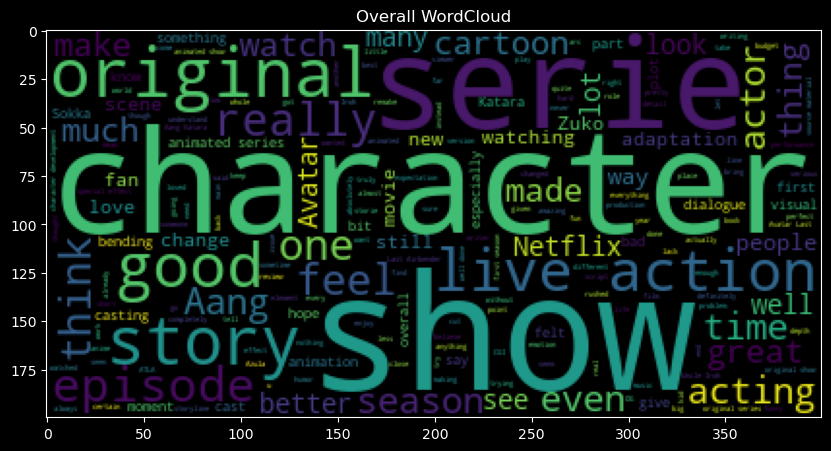

In [56]:
from wordcloud import WordCloud
style.use('dark_background')
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(words))
plt.title('Overall WordCloud')

Text(0.5, 1.0, 'Wordcloud of Positive feedbacks')

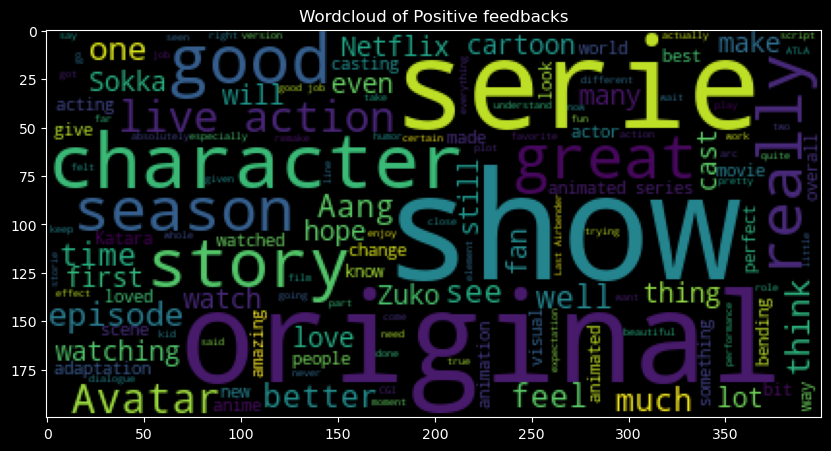

In [57]:
positive_list = positive['text'].tolist()
positive_words = " ".join(positive_list)
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(positive_words))
plt.title('Wordcloud of Positive feedbacks')

Text(0.5, 1.0, 'Wordcloud of Negative feedbacks')

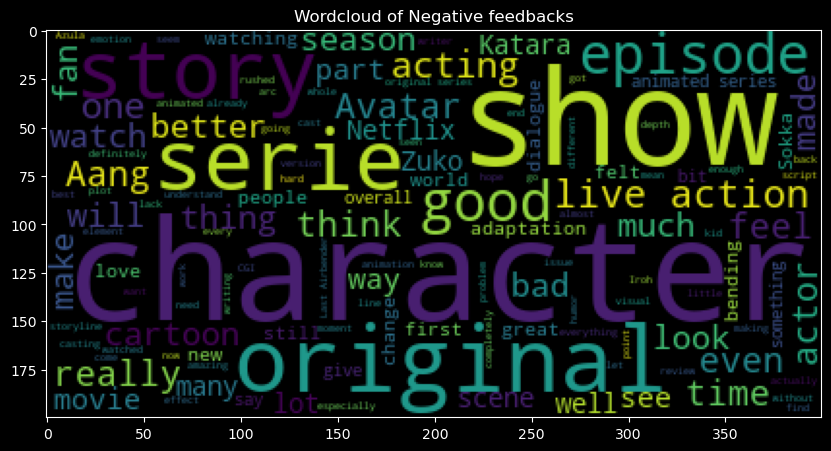

In [78]:
negative_list = negative['text'].tolist()
negative_words = " ".join(negative_list)

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(negative_words))
plt.title('Wordcloud of Negative feedbacks')

### 3.2: Removing Stopwords (except no, not ...)

In [59]:
import nltk
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

<img src="avatar_meme_2.jpg" width="700">

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
important_words = {
    'no', 'nor', 'not', 'don', "don't", 'ain', 'aren', "aren't", 
    'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 
    'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 
    'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 
    'wouldn', "wouldn't"
}
filtered_stop_words = stop_words - important_words
cleaned_sentences = [
    " ".join(
        word for word in sentence.split() if word.lower() not in filtered_stop_words
    )
    for sentence in sentences
]

cleaned_sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


["understand adapting cartoon series scene scene live adaptation impractical. However, removing lead character's pivotal arc, integral essence original story, weakens storytelling. Aang portrayed lacks innocence depth 12-year-old protagonist grew love; instead, he's presented young adult novel archetype warrior. Moreover, characters seem lack comedic traits defined them, resulting scenes feel devoid emotion overly somber. direction feels stagnant, characters rigidly placed delivering exposition rather engaging dynamically world around them. Numerous unnecessary changes detract impactful moments, surprising reveals, character development made original series compelling. appreciate efforts put visuals action sequences, shouldn't sole focus production substantial budget.",
 "I'm exhausted pointless live action remakes animated classics get angry anymore. Netflix redo AVATAR: LAST AIRBENDER best competent, handsome production design costuming. Storywise, strips humor original, leaving us g

(-0.5, 399.5, 199.5, -0.5)

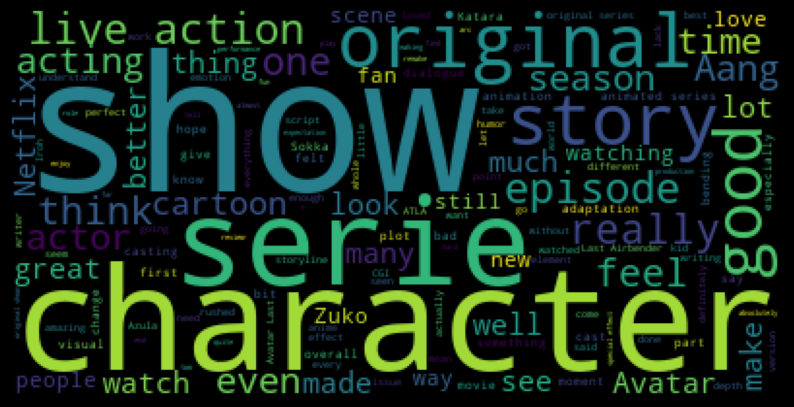

In [63]:
text_for_wordcloud = " ".join(cleaned_sentences)
plt.figure(figsize=(10, 10))
plt.imshow(WordCloud().generate(text_for_wordcloud))
plt.axis('off')  

### 3.3: Removing punctuation marks

In [47]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [48]:
without_pun = ["".join(char for char in cleaned_sentences if char not in string.punctuation and char != '\n') for cleaned_sentences in cleaned_sentences]
without_pun

['understand adapting cartoon series scene scene live adaptation impractical However removing lead characters pivotal arc integral essence original story weakens storytelling Aang portrayed lacks innocence depth 12yearold protagonist grew love instead hes presented young adult novel archetype warrior Moreover characters seem lack comedic traits defined them resulting scenes feel devoid emotion overly somber direction feels stagnant characters rigidly placed delivering exposition rather engaging dynamically world around them Numerous unnecessary changes detract impactful moments surprising reveals character development made original series compelling appreciate efforts put visuals action sequences sole focus production substantial budget',
 'Im exhausted pointless live action remakes animated classics get angry anymore Netflix redo AVATAR LAST AIRBENDER best competent handsome production design costuming Storywise strips humor original leaving us grim imitations characters loved sadsack

# Step 4: Insights

In [ ]:
import re
characters = ["Aang", "Katara", "Zuko", "Toph", "Sokka", "Azula", "Iroh", "Appa", "Momo" , "Ozai", "Suki", "Sozin", "Ty Lee", "Mai","Bumi","Yue", "Jet"]
positive_reviews = NLP_dataset[NLP_dataset['sentiment_category'] == 1]['text']
negative_reviews = NLP_dataset[NLP_dataset['sentiment_category'] == 0]['text']
def count_mentions(NLP_dataset, characters):
    mentions = {character: 0 for character in characters}
    for NLP_dataset in NLP_dataset:
        for character in characters:
            mentions[character] += len(re.findall(r'\b' + re.escape(character) + r'\b', NLP_dataset, flags=re.IGNORECASE))
    return mentions

positive_mentions = count_mentions(positive_reviews, characters)
negative_mentions = count_mentions(negative_reviews, characters)

mentions_df = pd.DataFrame({
    "Character": characters,
    "Positive Mentions": [positive_mentions[char] for char in characters],
    "Negative Mentions": [negative_mentions[char] for char in characters]
})
mentions_df  

,Character,Positive Mentions,Negative Mentions
0,Aang,60,109
1,Katara,40,71
2,Zuko,39,63
3,Toph,3,4
4,Sokka,40,57
5,Azula,7,36
6,Iroh,20,41
7,Appa,7,2
8,Momo,2,2
9,Ozai,4,16


<img src="avatar_meme_3.jpg" width="1000">

In [72]:
stihias = [ 'Fire', 'Water', 'Earth', 'Air']
positive_reviews = NLP_dataset[NLP_dataset['sentiment_category'] == 1]['text']
negative_reviews = NLP_dataset[NLP_dataset['sentiment_category'] == 0]['text']
def count_mentions(NLP_dataset, stihias):
    mentions = {stihia: 0 for stihia in stihias}
    for NLP_dataset in NLP_dataset:
        for stihia in stihias:
            mentions[stihia] += len(re.findall(r'\b' + re.escape(stihia) + r'\b', NLP_dataset, flags=re.IGNORECASE))
    return mentions

positive_mentions = count_mentions(positive_reviews, stihias)
negative_mentions = count_mentions(negative_reviews, stihias)

mentions_df1 = pd.DataFrame({
    "Stihias": stihias,
    "Positive Mentions": [positive_mentions[char] for char in stihias],
    "Negative Mentions": [negative_mentions[char] for char in stihias]
})
mentions_df1

,Stihias,Positive Mentions,Negative Mentions
0,Fire,10,21
1,Water,8,13
2,Earth,3,4
3,Air,5,12


<img src="avatar_meme_4.jpg" width="1000">